In [89]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from scipy.stats import sem



# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_df = pd.read_csv(clinical_trial_data_to_load)
clinical_trial_data_df.head()

# Combine the data into a single dataset
data_complete = pd.merge( clinical_trial_data_df,  mouse_drug_data_df,  how="left", on=["Mouse ID", "Mouse ID"])



# Display the data table for preview
data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,f932,0,45.000000,0,Ketapril
2,g107,0,45.000000,0,Ketapril
3,a457,0,45.000000,0,Ketapril
4,c819,0,45.000000,0,Ketapril
...,...,...,...,...,...
1901,r944,45,41.581521,2,Capomulin
1902,u364,45,31.023923,3,Capomulin
1903,p438,45,61.433892,1,Ceftamin
1904,x773,45,58.634971,4,Placebo


In [115]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

drugs = data_complete["Drug"].unique()
timepoints = data_complete["Timepoint"].unique()




mean_df = pd.DataFrame(columns= ["Drug", "Timepoint", "Mean Tumor Volume (mm3)"])


for drug in range (0, len(drugs)):
    for timepoint in range (0, len(timepoints)):
        
        drugs_data_complete = data_complete.loc[(data_complete["Drug"]==drugs[drug]) &(data_complete["Timepoint"]==timepoints[timepoint]) ]
        mean_tumor=drugs_data_complete["Tumor Volume (mm3)"].mean()
        
        mean_df1 = pd.DataFrame({
            "Drug": drugs[drug],
            "Timepoint": timepoints[timepoint],
            "Mean Tumor Volume (mm3)": [mean_tumor]
            })
        # Concat DataFrames
        mean_df = pd.concat([mean_df, mean_df1], axis=0)
        
mean_df = mean_df.reset_index(drop=True)


# Preview DataFrame
mean_df.head()

,Drug,Timepoint,Mean Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [117]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

standard_error_df = pd.DataFrame(columns= ["Drug", "Timepoint", "Standard Error of Tumor Volume"])

for drug in range (0, len(drugs)):
    for timepoint in range (0, len(timepoints)):
        
        drugs_data_complete = data_complete.loc[(data_complete["Drug"]==drugs[drug]) &(data_complete["Timepoint"]==timepoints[timepoint]) ]
        standard_error = drugs_data_complete["Tumor Volume (mm3)"].sem()
        standard_error_df1 = pd.DataFrame({
            "Drug": drugs[drug],
            "Timepoint": timepoints[timepoint],
            "Standard Error of Tumor Volume": [standard_error]
            })
        # Concat DataFrames
        standard_error_df = pd.concat([standard_error_df, standard_error_df1], axis=0)

# Preview DataFrame
standard_error_df = standard_error_df.reset_index(drop=True)
standard_error_df.head()


,Drug,Timepoint,Standard Error of Tumor Volume
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [118]:
# Minor Data Munging to Re-Format the Data Frames


formated_df = mean_df.pivot("Timepoint", "Drug", "Mean Tumor Volume (mm3)")
formated_df.head(10)


    

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


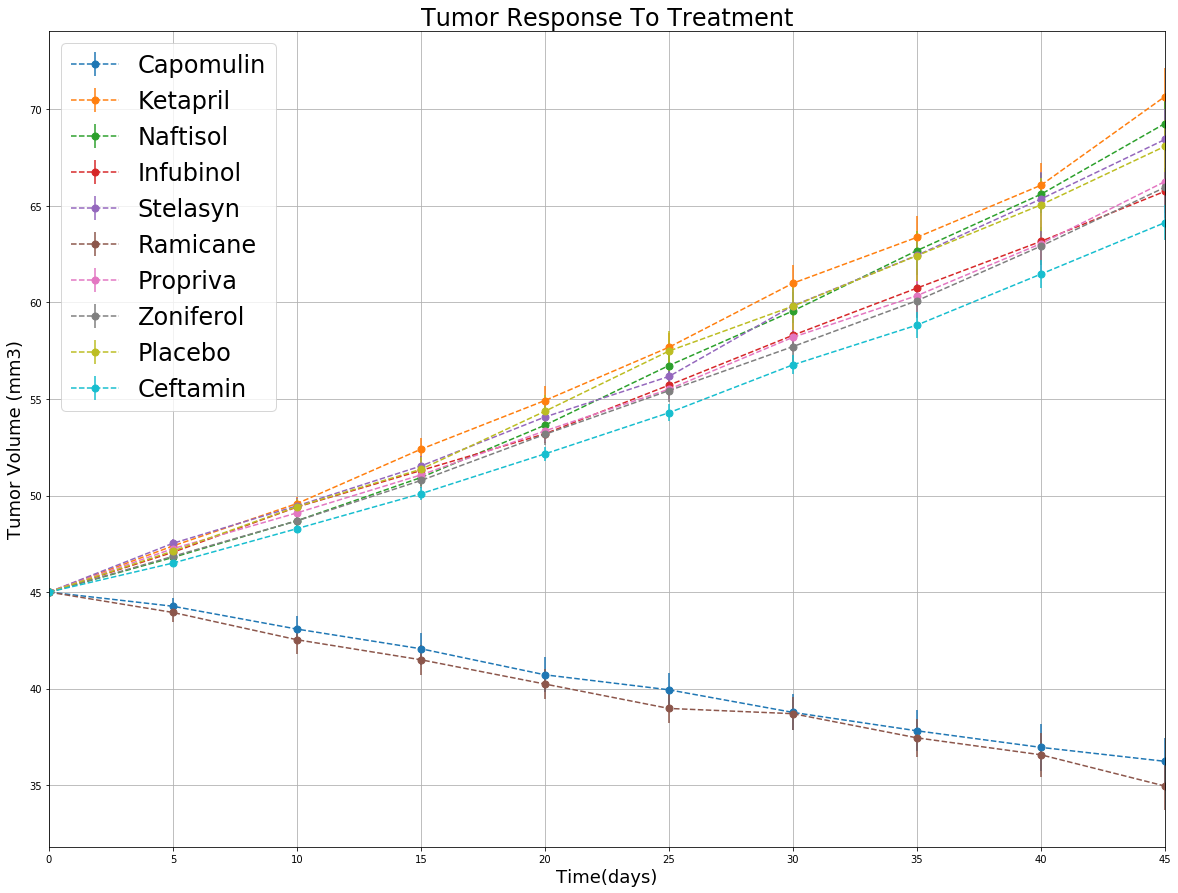

In [151]:
# Generate the Plot (with Error Bars)



fig,ax = plt.subplots(figsize=(20, 15))


x_axis = timepoints



for drug in drugs:
    means=mean_df[mean_df["Drug"]==drug]["Mean Tumor Volume (mm3)"]
    standard_errors = standard_error_df[mean_df["Drug"]==drug]["Standard Error of Tumor Volume"]
    ax.errorbar(x_axis, means, standard_errors, fmt="o", linestyle='dashed', markersize=7)
    
ax.set_xlim(0, timepoints[len(timepoints)-1] )
ax.set_title("Tumor Response To Treatment", fontsize=24)
ax.set_xlabel("Time(days)", fontsize=18)
ax.set_ylabel("Tumor Volume (mm3)", fontsize=18)
ax.legend(drugs, loc="upper left", prop={'size': 24})

plt.grid()

# Save the Figure
if (os.path.exists("Images")==False):
    os.mkdir('Images')
plt.savefig("Images/Tumor Responce To Treatment.png")

# Show the Figure
plt.show()

In [94]:
#Metastatic Response to Treatment

In [170]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_df = pd.DataFrame(columns= ["Drug", "Timepoint", "Mean Of Metastatic Sites"])


for drug in range (0, len(drugs)):
    for timepoint in range (0, len(timepoints)):
        
        drugs_data_complete = data_complete.loc[(data_complete["Drug"]==drugs[drug]) &(data_complete["Timepoint"]==timepoints[timepoint]) ]
        mean_met=drugs_data_complete["Metastatic Sites"].mean()
        
        mean_met_df1 = pd.DataFrame({
            "Drug": drugs[drug],
            "Timepoint": timepoints[timepoint],
            "Mean Of Metastatic Sites": [mean_met]
            })
        # Concat DataFrames
        mean_met_df = pd.concat([mean_met_df, mean_met_df1], axis=0)
        
mean_met_df = mean_met_df.reset_index(drop=True)
mean_met_df1 = mean_met_df.set_index("Drug")


# Preview DataFrame
mean_met_df1.head()



,Timepoint,Mean Of Metastatic Sites
Drug,,
Capomulin,0,0.000000
Capomulin,5,0.160000
Capomulin,10,0.320000
Capomulin,15,0.375000
Capomulin,20,0.652174


In [121]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_standard_error_df = pd.DataFrame(columns= ["Drug", "Timepoint", "Standard Error of Metastatic Sites"])

for drug in range (0, len(drugs)):
    for timepoint in range (0, len(timepoints)):
        
        drugs_data_complete = data_complete.loc[(data_complete["Drug"]==drugs[drug]) &(data_complete["Timepoint"]==timepoints[timepoint]) ]
        standard_error = drugs_data_complete["Metastatic Sites"].sem()
        met_standard_error_df1 = pd.DataFrame({
            "Drug": drugs[drug],
            "Timepoint": timepoints[timepoint],
            "Standard Error of Metastatic Sites": [standard_error]
            })
        # Concat DataFrames
        met_standard_error_df = pd.concat([met_standard_error_df, met_standard_error_df1], axis=0)

# Preview DataFrame

met_standard_error_df = met_standard_error_df.reset_index(drop=True)
met_standard_error_df1 = met_standard_error_df.set_index("Drug")

                                                       
met_standard_error_df1.head()



,Timepoint,Standard Error of Metastatic Sites
Drug,,
Capomulin,0,0.000000
Capomulin,5,0.074833
Capomulin,10,0.125433
Capomulin,15,0.132048
Capomulin,20,0.161621


In [122]:
# Minor Data Munging to Re-Format the Data Frames

formated_met_df = mean_met_df.pivot("Timepoint", "Drug", "Mean Of Metastatic Sites")
formated_met_df.head(10)


# Preview that Reformatting worked

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


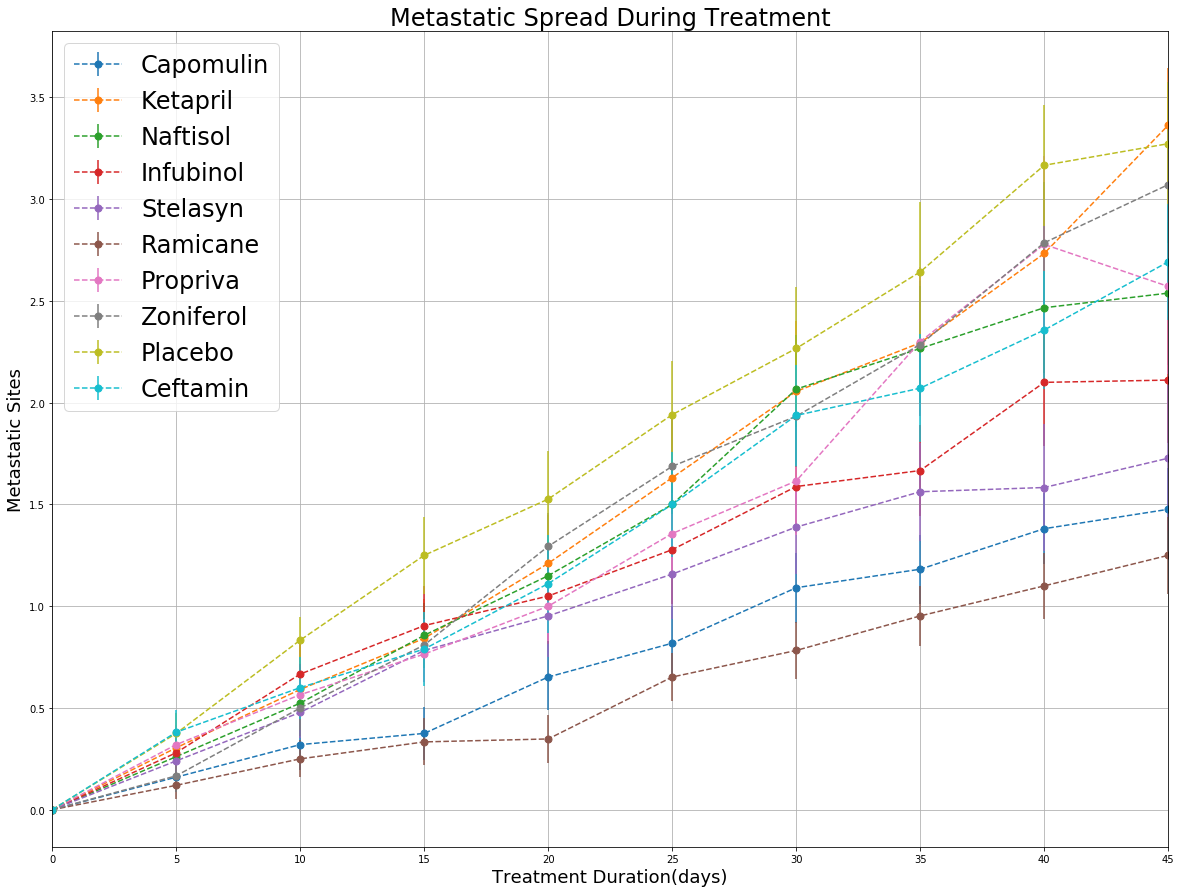

In [152]:
fig,ax = plt.subplots(figsize=(20, 15))


x_axis = timepoints


for drug in drugs:
    met_means=mean_met_df[mean_met_df["Drug"]==drug]["Mean Of Metastatic Sites"]
    met_standard_errors = met_standard_error_df[mean_met_df["Drug"]==drug]["Standard Error of Metastatic Sites"]
    ax.errorbar(x_axis, met_means, met_standard_errors, fmt="o", linestyle='dashed', markersize=7)
    
ax.set_xlim(0, timepoints[len(timepoints)-1] )
ax.set_title("Metastatic Spread During Treatment", fontsize=24)
ax.set_xlabel("Treatment Duration(days)", fontsize=18)
ax.set_ylabel("Metastatic Sites", fontsize=18)
ax.legend(drugs, loc="best", prop={'size': 24})

plt.grid()

# Save the Figure
if (os.path.exists("Images")==False):
    os.mkdir('Images')
plt.savefig("Images/Metastatic Responce To Treatment.png")

# Show the Figure
plt.show()

In [124]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count_df = pd.DataFrame(columns= ["Drug", "Timepoint", "Count Of Mice"])


for drug in range (0, len(drugs)):
    for timepoint in range (0, len(timepoints)):
        
        drugs_data_complete = data_complete.loc[(data_complete["Drug"]==drugs[drug]) &(data_complete["Timepoint"]==timepoints[timepoint]) ]
        mice_count=drugs_data_complete["Mouse ID"].count()
        
        mice_count_df1 = pd.DataFrame({
            "Drug": drugs[drug],
            "Timepoint": timepoints[timepoint],
            "Count Of Mice": [mice_count]
            
            })
        # Concat DataFrames
        mice_count_df = pd.concat([mice_count_df, mice_count_df1], axis=0)
        
mice_count_df = mice_count_df.reset_index(drop=True)



# Preview DataFrame
mice_count_df.head()



,Drug,Timepoint,Count Of Mice
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [125]:
# Minor Data Munging to Re-Format the Data Frames
formated_mice_count_df = mice_count_df.pivot("Timepoint", "Drug", "Count Of Mice")


# Preview the Data Frame
formated_mice_count_df.head(10)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


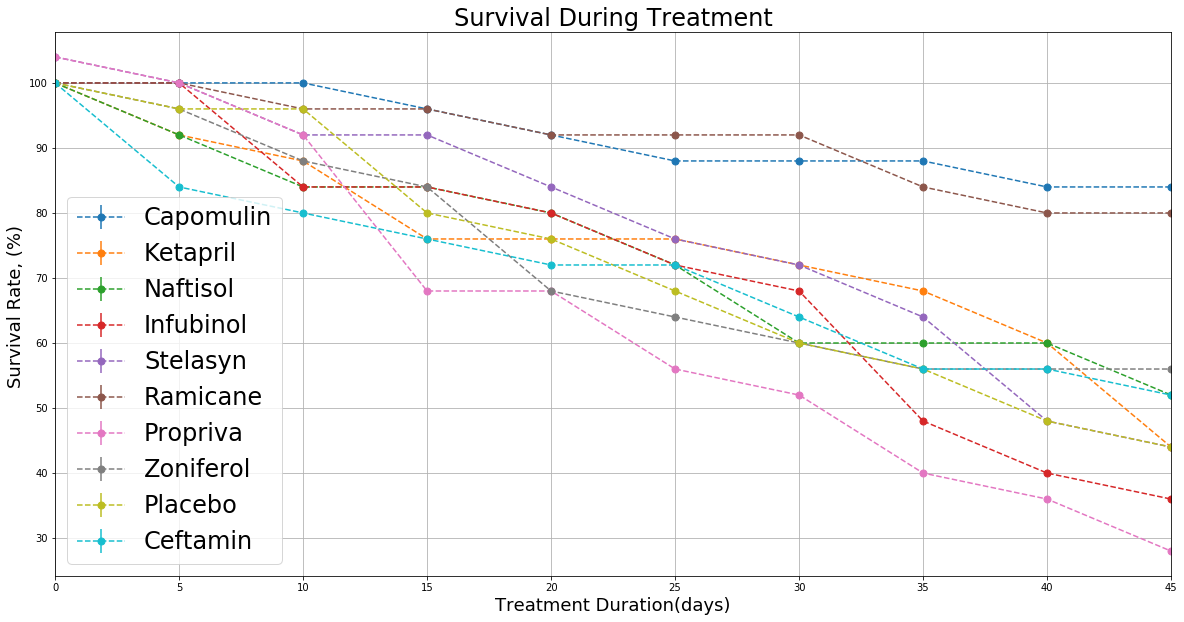

In [165]:
# Generate the Plot (Accounting for percentages)
fig,ax = plt.subplots(figsize=(20, 10))


x_axis = timepoints



for drug in drugs:
    mice_count = (mice_count_df[mice_count_df["Drug"]==drug]["Count Of Mice"]/25)*100
    mouse_standard_errors = [0,0,0,0,0,0,0,0,0,0]
    ax.errorbar(x_axis, mice_count, mouse_standard_errors, fmt="o", linestyle='dashed', markersize=7)
    
ax.set_xlim(0, timepoints[len(timepoints)-1] )
ax.set_title("Survival During Treatment", fontsize=24)
ax.set_xlabel("Treatment Duration(days)", fontsize=18)
ax.set_ylabel("Survival Rate, (%) ", fontsize=18)
ax.legend(drugs, loc="best", prop={'size': 24})

plt.grid()
    

if (os.path.exists("Images")==False):
    os.mkdir('Images')
plt.savefig("Images/Survival Rate.png")


# Show the Figure
plt.show()

In [189]:
#Calculate the percent changes for each drug


tumor_change_df = pd.DataFrame(columns= ["Drug",  "Tumor Change in %"])
#tumor_beg=[]
#tumor_end=[]

for drug in range (0, len(drugs)):
    for timepoint in range (0, len(timepoints)):
        
        drugs_data_complete = data_complete.loc[(data_complete["Drug"]==drugs[drug]) &(data_complete["Timepoint"]==timepoints[timepoint]) ]
        
        if timepoints[timepoint] == 0:
            tumor_beg = drugs_data_complete["Tumor Volume (mm3)"].mean()
            
        if timepoints[timepoint] == 45:
            tumor_end = drugs_data_complete["Tumor Volume (mm3)"].mean()
            
        tumor_change=((tumor_end-tumor_beg)/tumor_beg)*100
        
        
        
    tumor_change_df1 = pd.DataFrame({
            "Drug": drugs[drug],
            "Tumor Change in %": [tumor_change]
            })
        # Concat DataFrames
    tumor_change_df = pd.concat([tumor_change_df, tumor_change_df1], axis=0)
        
tumor_change_df = tumor_change_df.reset_index(drop=True)
tumor_change_df.head(10)



,Drug,Tumor Change in %
0,Capomulin,-19.475303
1,Ketapril,57.028795
2,Naftisol,53.923347
3,Infubinol,46.123472
4,Stelasyn,52.085134
5,Ramicane,-22.320900
6,Propriva,47.241175
7,Zoniferol,46.579751
8,Placebo,51.297960
9,Ceftamin,42.516492


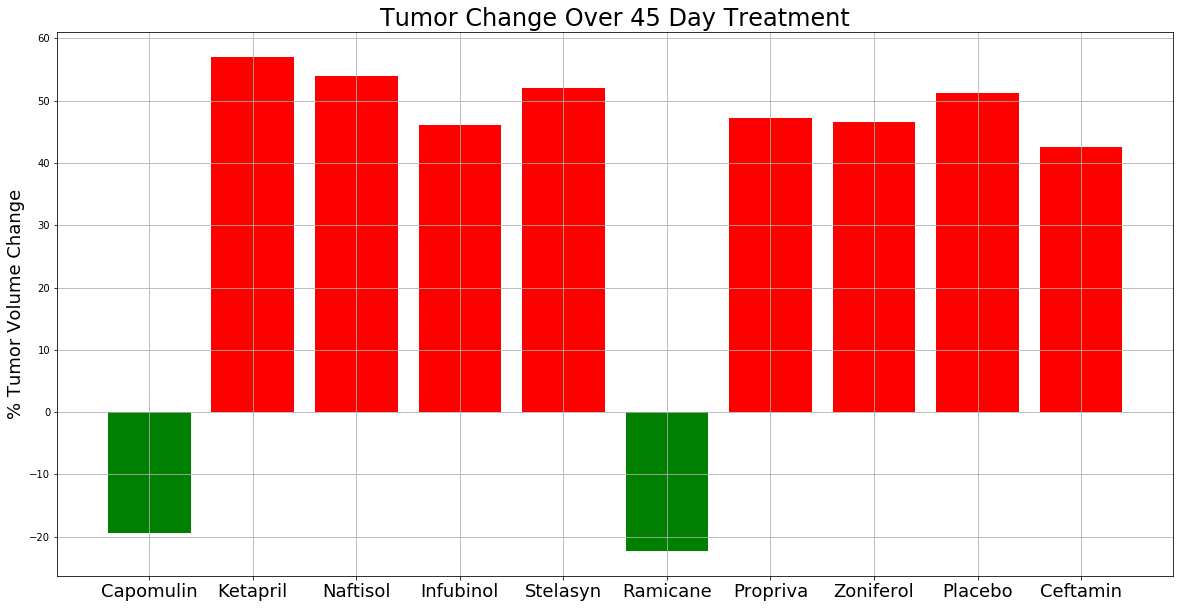

In [213]:
# Store all Relevant Percent Changes into a Tuple


fig,ax = plt.subplots(figsize=(20, 10))

tumor_change=tumor_change_df["Tumor Change in %"]
index = np.arange(len(tumor_change))

x_axis = drugs

for i in range (0, len(drugs)):
    if (tumor_change[i]>0):
        ax.bar(drugs[i],tumor_change[i], color="red")        
    else:
        ax.bar(drugs[i],tumor_change[i], color="green") 
           
   #ax.bar(ind[0], pct_changes[0], width, color='green')         

ax.set_xticks(index)
ax.set_xticklabels(drugs, fontsize=18)            
ax.set_ylabel('% Tumor Volume Change', fontsize=18)
ax.set_title('Tumor Change Over 45 Day Treatment', fontsize=24)
plt.grid()

if (os.path.exists("Images")==False):
    os.mkdir('Images')
plt.savefig("Images/Tumor Volume Change.png")




# Show the Figure
fig.show()